# Quantitative Momentum Algo

## Summary: 
the point of this project is to build a Momentum algorithm based on stock market data. the goal of this algo is to invest more in good momentum stocks, a good momentum stock means that the stock did well in the past so will do well in the future. another thing that makes some momentum better then others is if it is a slow and steady growth instead of random news that makes the stock go up.

Strategy: get a stocks data for the last year check the return as well as check the standard deviation and divide the std by the stock return and see if that stock does well the next year


## Imports

In [2]:
import pandas as pd
import numpy as np
from yahooquery import Ticker


## get historical data for one stock 

In [32]:
tickers = Ticker('aapl')

df = tickers.history(start='2018-01-01',end='2019-01-01')
df.head()

,open,low,high,volume,close,adjclose,dividends
2018-01-02 14:30:00,42.540001,42.314999,43.075001,102223600,43.064999,41.442081,0.0
2018-01-03 14:30:00,43.132500,42.990002,43.637501,118071600,43.057499,41.434864,0.0
2018-01-04 14:30:00,43.134998,43.020000,43.367500,89738400,43.257500,41.627323,0.0
2018-01-05 14:30:00,43.360001,43.262501,43.842499,94640000,43.750000,42.101261,0.0
2018-01-08 14:30:00,43.587502,43.482498,43.902500,82271200,43.587502,41.944889,0.0


## percent change and std

In [40]:
stock_return = (df['adjclose'][-1] - df['adjclose'][0])/ df['adjclose'][0]
stock_std = np.std(df['adjclose'].pct_change())

momentum_score = stock_return / stock_std
momentum_score

-3.903894592221692

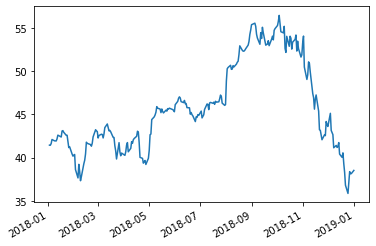

In [34]:
df['adjclose'].plot()

## Get all stock data

In [42]:
stocks = pd.read_csv('sp_500_stocks.csv')

In [46]:
stocks.values.flatten()[:5]

array(['A', 'AAL', 'AAP', 'AAPL', 'ABBV'], dtype=object)

In [53]:
tickers = Ticker(list(stocks.values.flatten()),asynchronous=True)

In [57]:
df = tickers.history(start='2018-01-01',end='2019-01-01')


In [70]:
momentum_scores = []
for stock in stocks.values.flatten():
    try:
        stock_return = (df[stock]['adjclose'][-1] - df[stock]['adjclose'][0])/ df[stock]['adjclose'][0]
        stock_std = np.std(df[stock]['adjclose'].pct_change())

        momentum_score = stock_return / stock_std
        momentum_scores.append(momentum_score)
    except:
        momentum_scores.append(None)

In [73]:
stocks['scores'] = momentum_scores

In [81]:
stocks.dropna(inplace=True)

In [85]:
stocks.reset_index(inplace=True)

In [87]:
from scipy import stats
rank = []
for i in range(len(stocks)):
    rank.append(stats.percentileofscore(stocks['scores'],stocks['scores'][i]))

In [88]:
stocks['rank'] = rank

In [91]:
stocks.sort_values(['rank'],ascending=False)

,index,Ticker,scores,rank
145,150,DXCM,32.394971,100.000000
309,316,MRK,31.896961,99.798387
300,307,MKC,30.889894,99.596774
276,283,LLY,28.291393,99.395161
256,263,KEYS,26.747614,99.193548
...,...,...,...,...
205,212,HAL,-24.064982,1.008065
173,178,FBHS,-24.340475,0.806452
257,264,KHC,-26.159631,0.604839
246,253,IVZ,-28.389755,0.403226


## test results on next years returns

In [101]:
tickers = Ticker(list(stocks['Ticker'].values.flatten()),asynchronous=True)
df = tickers.history(start='2019-01-01',end='2020-01-01')


In [114]:
stock_return = []
for i in stocks['Ticker']:
    stock_return.append((df.loc[i]['adjclose'][-1] - df.loc[i]['adjclose'][0])/ df.loc[i]['adjclose'][0])


In [116]:
stocks['next_year_returns'] = stock_return

In [120]:
stocks = stocks.sort_values('rank',ascending=False)

In [135]:
# top 50
stocks[:50]['next_year_returns'].mean()

0.351690373620749

In [136]:
# last 50
stocks[-50:]['next_year_returns'].mean()

0.271990220063803

In [137]:
# overall return 
stocks['next_year_returns'].mean()

0.3186590849487391

In [151]:
# the pval is less then .05 
from scipy import stats
stats.ttest_1samp(stocks['next_year_returns'], .3516)

Ttest_1sampResult(statistic=-2.9957491839101316, pvalue=0.0028749754640636626)

## Conclusion:
seems like there this algorithm worked however do I only tested it on one years worth of data so i wouldn't fully trust it yet but it seems like it somewhat worked. Also disclaimer i am not liable for any trades made based on these results this was done for educational purposes.